In a previous notebook, I have shown that the [](https://laurentperrinet.github.io/sciblog/posts/2021-03-27-density-of-stars-on-the-surface-of-the-sky.html). Here, I would like to use the existing database of stars' positions and display them as a triangulation 

<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
import numpy as np
np.set_printoptions(precision=6, suppress=True)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 10
figsize = (fig_width, fig_width/phi)

## importing data

Importing all stars' position is as simple as invoking the [HYG database](https://github.com/astronexus/HYG-Database):

In [2]:
import pandas as pd
url = "https://github.com/astronexus/HYG-Database/raw/master/hygdata_v3.csv"
space = pd.read_csv(url, index_col=0)

In [3]:
print(f'Columns in the database: {space.columns=}')

Columns in the database: space.columns=Index(['hip', 'hd', 'hr', 'gl', 'bf', 'proper', 'ra', 'dec', 'dist', 'pmra',
       'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z', 'vx',
       'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'bayer', 'flam',
       'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min',
       'var_max'],
      dtype='object')


In [4]:
print(f'Number of stars in the catalog = {len(space)=}')

Number of stars in the catalog = len(space)=119614


## extracting ra, dec and mag

For which we may extract what interests us: position (right ascension and declination) and visual magnitude:

In [5]:
space_pos = space[['ra', 'dec', 'mag']]
space_pos

ra        dec    mag
id                                 
0        0.000000   0.000000 -26.70
1        0.000060   1.089009   9.10
2        0.000283 -19.498840   9.27
3        0.000335  38.859279   6.61
4        0.000569 -51.893546   8.06
...           ...        ...    ...
119611  23.963895  38.629391  12.64
119612  23.996567  47.762093  16.10
119613  23.996218 -44.067905  12.82
119614  23.997386 -34.111986  12.80
119615   0.036059 -43.165974  13.05

[119614 rows x 3 columns]

First, [right ascension](https://en.wikipedia.org/wiki/Right_ascension) is "the angular distance of a particular point measured eastward along the celestial equator from the Sun at the March equinox to the (hour circle of the) point in question above the earth." It is given in *hours*:

In [6]:
ra_min, ra_max = 0, 24
print(f"RA: {space_pos['ra'].min()=}, {space_pos['ra'].max()=}")

RA: space_pos['ra'].min()=0.0, space_pos['ra'].max()=23.998594


Let's convert this in visual angle, that is in an azimuth:

In [7]:
space_norm = space_pos.copy()
space_norm

ra        dec    mag
id                                 
0        0.000000   0.000000 -26.70
1        0.000060   1.089009   9.10
2        0.000283 -19.498840   9.27
3        0.000335  38.859279   6.61
4        0.000569 -51.893546   8.06
...           ...        ...    ...
119611  23.963895  38.629391  12.64
119612  23.996567  47.762093  16.10
119613  23.996218 -44.067905  12.82
119614  23.997386 -34.111986  12.80
119615   0.036059 -43.165974  13.05

[119614 rows x 3 columns]

In [8]:
def ra2az(ra):
    return az_max - ra / ra_max * az_max

In [9]:
space_norm["az"] =  space_norm["ra"] *.1 #ra2az(space_pos['ra'])

In [10]:
az_min, az_max = 0, 360
print(f"AZ: {space_norm['az'].min()=}, {space_norm['az'].max()=}")

AZ: space_norm['az'].min()=0.0, space_norm['az'].max()=2.3998594


Then, [declination](https://en.wikipedia.org/wiki/Declination) is "comparable to geographic latitude, projected onto the celestial sphere" and is given here in degrees:

In [11]:
dec_min, dec_max = -90, 90
print(f"DEC: {space_norm['dec'].min()=}, {space_norm['dec'].max()=}")

DEC: space_norm['dec'].min()=-89.782428, space_norm['dec'].max()=89.569427


The [magnitude](https://en.wikipedia.org/wiki/Apparent_magnitude) varies a lot (the less the value, the more it is visible - "The apparent magnitudes of known objects range from the Sun at −26.7 to objects in deep Hubble Space Telescope images of magnitude +31.5"):

In [12]:
print(f"mag: {space_norm['mag'].min()=}, {space_norm['mag'].max()=}")

mag: space_norm['mag'].min()=-26.7, space_norm['mag'].max()=21.0


Let's normalize the lower bound:

In [13]:
space_norm['mag'] = space_pos['mag'] - space_pos['mag'].min()
print(f"mag: {space_norm['mag'].min()=}, {space_norm['mag'].max()=}")

mag: space_norm['mag'].min()=0.0, space_norm['mag'].max()=47.7


Let's define a threshold using the [quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html#pandas-dataframe-quantile) function:

In [14]:
print(f"{space_norm['mag'].quantile(q=0.01)=}")

space_norm['mag'].quantile(q=0.01)=31.45


Which leaves only a limited number of stars

In [15]:
space_bright = space_norm[space_norm['mag']<space_norm['mag'].quantile(q=0.05)]

In [16]:
#space_bright = space_pos[space_pos['mag']<6]

In [17]:
print(f'Number of bright stars = {len(space_bright)=}')

Number of bright stars = len(space_bright)=5955


In [18]:
print(f"MAG: {space_bright['mag'].min()=}, {space_bright['mag'].max()=}")

MAG: space_bright['mag'].min()=0.0, space_bright['mag'].max()=32.85


## scatter plots

From these elements, we may plot the stars on these coordinates:

In [19]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.scatter(space_bright['az'], space_bright['dec'], s=.1 * (space_bright['mag'].max()-space_bright['mag']))
ax.set_xlabel('Azimuth')
ax.set_ylabel('Declination')
ax.set_xlim(az_min, az_max)
ax.set_ylim(dec_min, dec_max);

do you see the [Milky way](https://en.wikipedia.org/wiki/Milky_Way)?

## Orion

We may want to focus on the [Orion constellation](https://en.wikipedia.org/wiki/Orion_(constellation)):

In [20]:
orion_az_max, orion_az_min = ra2az(4.8), ra2az(6.25)
orion_dec_min, orion_dec_max = -13.0, 22.
space_orion = space_bright[(orion_az_min < space_bright['az']) * (space_bright['az'] < orion_az_max) *
                                (orion_dec_min < space_bright['dec']) * (space_bright['dec'] < orion_dec_max)]

In [21]:
print(f'Number of bright stars in orion = {len(space_orion)=}')

Number of bright stars in orion = len(space_orion)=0


In [22]:
print(f"MAG: {space_orion['mag'].min()=}, {space_orion['mag'].max()=}")

MAG: space_orion['mag'].min()=nan, space_orion['mag'].max()=nan


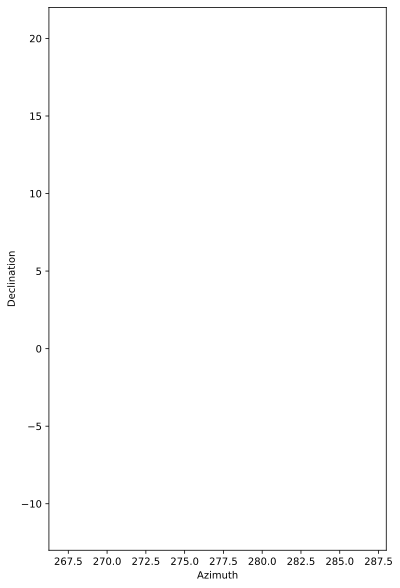

In [23]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.scatter(space_orion['az'], space_orion['dec'], s= 10 * (space_orion['mag'].max()-space_orion['mag']))
ax.set_aspect('equal')
ax.set_xlabel('Azimuth')
ax.set_ylabel('Declination')
ax.set_xlim(orion_az_min, orion_az_max)
ax.set_ylim(orion_dec_min, orion_dec_max);

Which is to be compared to this image:

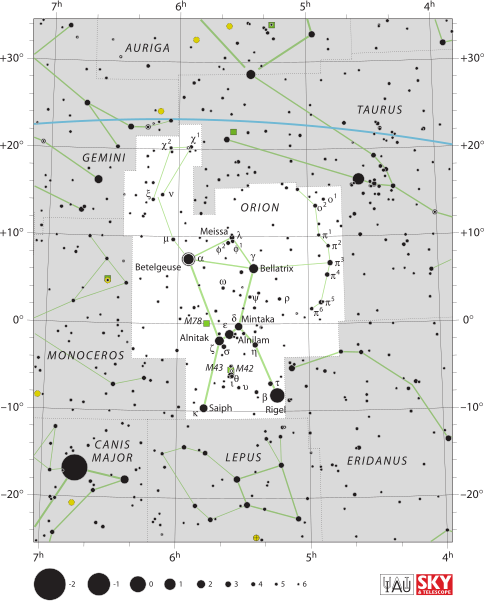

In [24]:
from  IPython.display import display, SVG, Image
display(SVG('https://upload.wikimedia.org/wikipedia/commons/f/ff/Orion_IAU.svg'))

## Triangulation

Following work with [Etienne Rey](https://laurentperrinet.github.io/author/etienne-rey/), we have developped visualization based on [triangulation](https://laurentperrinet.github.io/post/2019-06-22_ardemone/) of an [optimal packing](https://laurentperrinet.github.io/post/2021-10-04_interstices/) of point clouds.

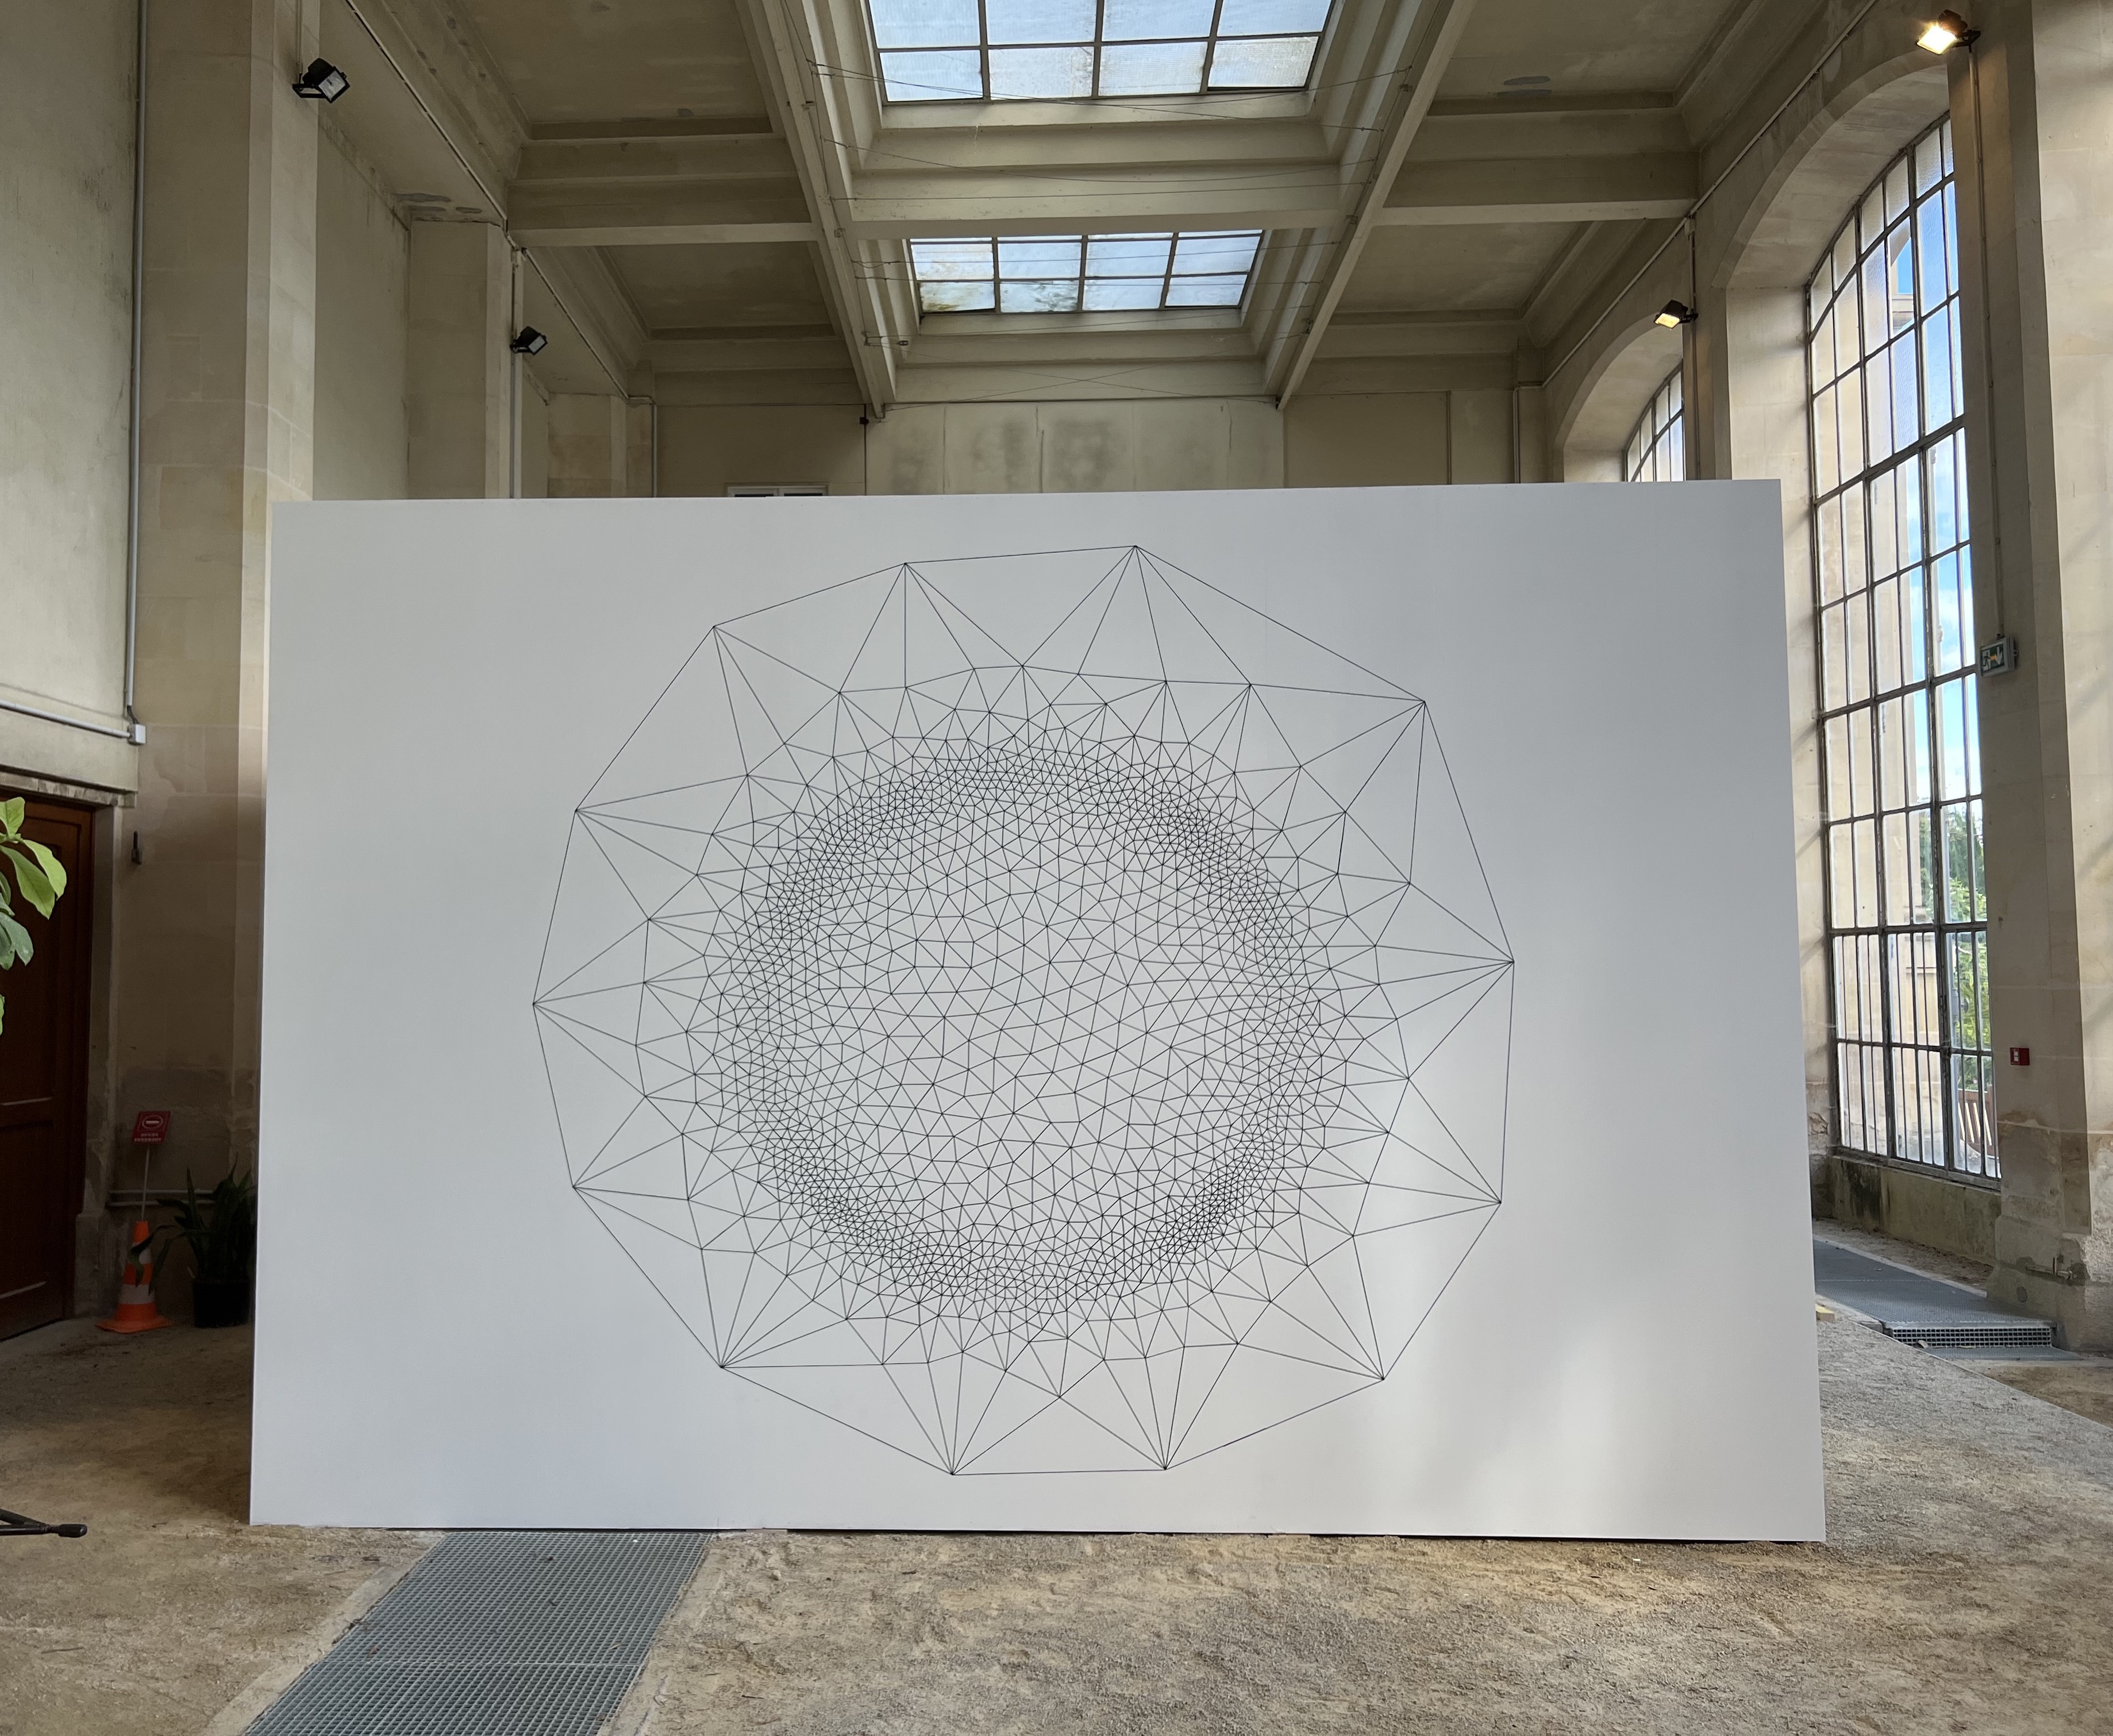

In [25]:
display(Image('https://laurentperrinet.github.io/post/2021-10-04_interstices/featured.jpg'))

The idea here is to apply such a visualization to the stars position. IT is based on 

In [26]:
import matplotlib.tri as tri
triang = tri.Triangulation(space_bright['az'], space_bright['dec'])

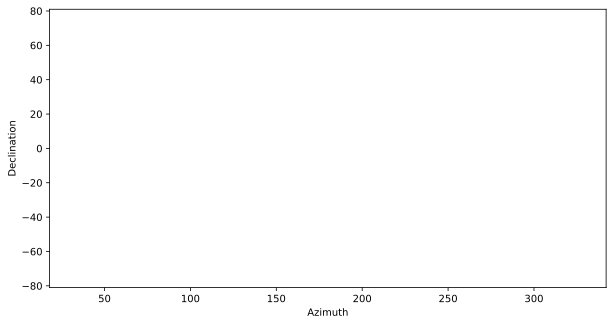

In [27]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.triplot(triang, lw=0.1, color='k')
ax.set_aspect('equal')
ax.set_xlabel('Azimuth')
ax.set_ylabel('Declination')
border_ratio = .95
ax.set_xlim(az_min+(az_max-az_min)*(1-border_ratio), az_min+(az_max-az_min)*border_ratio)
ax.set_ylim(dec_min+(dec_max-dec_min)*(1-border_ratio), dec_min+(dec_max-dec_min)*border_ratio);

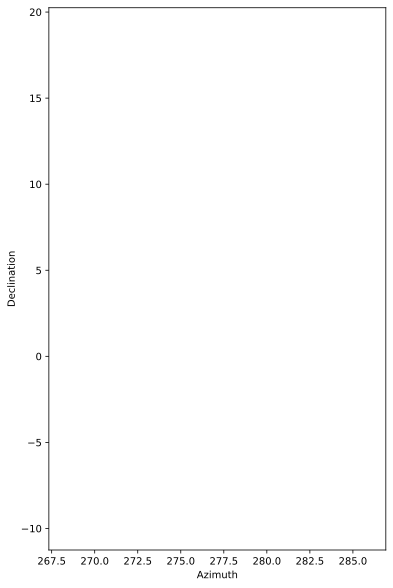

In [28]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.triplot(triang, lw=0.9, color='k')
ax.scatter(space_orion['az'], space_orion['dec'], s= 40 * (space_orion['mag'].max()-space_orion['mag']))
ax.set_aspect('equal')
ax.set_xlabel('Azimuth')
ax.set_ylabel('Declination')
ax.set_xlim(orion_az_min+(orion_az_max-orion_az_min)*(1-border_ratio), orion_az_min+(orion_az_max-orion_az_min)*border_ratio)
ax.set_ylim(orion_dec_min+(orion_dec_max-orion_dec_min)*(1-border_ratio), orion_dec_min+(orion_dec_max-orion_dec_min)*border_ratio);

In [29]:
space_norm['mag'].quantile(q=q)

NameError: name 'q' is not defined

In [ ]:
space_orion = space_norm[space_norm['mag']<space_norm['mag'].quantile(q=q)]

In [ ]:
space_orion = space_orion[(orion_az_min < space_orion['az']) * (space_orion['az'] < orion_az_max) *
                           (orion_dec_min < space_orion['dec']) * (space_orion['dec'] < orion_dec_max)]

In [ ]:
space_orion

Let's now super-impose different triangulations at different magnitudes:

In [ ]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))

for mag in range(1, 6):
    q = 1 - 0.8**mag
    print (q)
    #space_orion = space_norm.copy()
    space_orion = space_norm[space_norm['mag']<space_norm['mag'].quantile(q=q)]
    space_orion = space_orion[(orion_az_min < space_orion['az']) * (space_orion['az'] < orion_az_max) *
                               (orion_dec_min < space_orion['dec']) * (space_orion['dec'] < orion_dec_max)]
    print(f'{q=:.3f}, Number of bright stars = {len(space_orion)=}')
    triang = tri.Triangulation(space_orion['az'], space_bright['dec'])
    ax.triplot(triang, lw=q, color='k')
ax.scatter(space_orion['az'], space_orion['dec'], s= 40 * (space_orion['mag'].max()-space_orion['mag']))
ax.set_aspect('equal')
ax.set_xlabel('Azimuth')
ax.set_ylabel('Declination')
ax.set_xlim(orion_az_min+(orion_az_max-orion_az_min)*(1-border_ratio), orion_az_min+(orion_az_max-orion_az_min)*border_ratio)
ax.set_ylim(orion_dec_min+(orion_dec_max-orion_dec_min)*(1-border_ratio), orion_dec_min+(orion_dec_max-orion_dec_min)*border_ratio);

## some book keeping for the notebook

In [ ]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,matplotlib,scipy,pillow,imageio  -r -g -b